# **Τεχνικές Εξόρυξης Δεδομένων - Εργασία 1** <br> 

---


**Κωστής Μαϊδάτσης   (1115201800102) <br> Διονύσιος Μανιατάκος (1115201800104)**

## **Ερωτήματα**

### **Εισαγωγή Δεδομένων**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#make sure the csv files are uploaded

netflix_data = pd.read_csv("netflix_titles.csv")
netflix_data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


### **Ερώτημα 1**

---
Μέτρηση πλήθους ταινιών και σειρών και παρουσίαση τους σε bar διάγραμμα


There are more movies than TV shows (5377 movies, 2410 TV Shows)


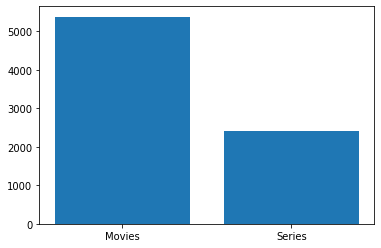

In [2]:
def print_most_popular_type(df, title = ""):
  most_popular_type = df.type.value_counts()
  movie_amount = most_popular_type.get('Movie')
  shows_amount = most_popular_type.get('TV Show')
  if movie_amount > shows_amount:
    print("There are more movies than TV shows (" + str(movie_amount) + " movies, " + str(shows_amount) + " TV Shows)")
  else:
    print("There are more TV Shows than movies (" + str(movie_amount) + " movies, " + str(shows_amount) + " TV Shows)")
  
  plt.bar(['Movies', 'Series'], [movie_amount, shows_amount])
  plt.title(title)
  plt.show()

print_most_popular_type(netflix_data)

### **Ερώτημα 2**

---
Η παρακάτω συνάρτηση καλεί τη συνάρτηση του ερωτήματος 1 για dataframe που περιορίζεται σε τίτλους μιας συγκεκριμένης χρονιάς


There are more movies than TV shows (258 movies, 185 TV Shows)


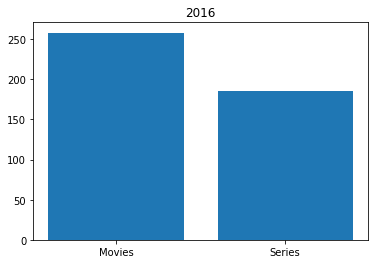

There are more movies than TV shows (864 movies, 361 TV Shows)


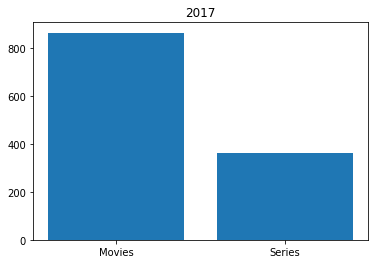

There are more movies than TV shows (1255 movies, 430 TV Shows)


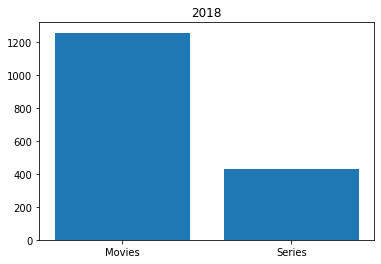

There are more movies than TV shows (1497 movies, 656 TV Shows)


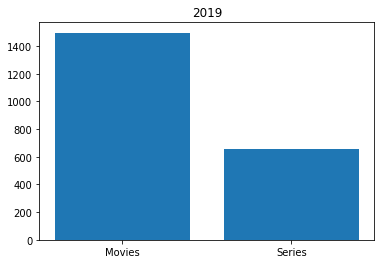

In [3]:
def print_most_popular_type_in_year(df, year):
  #remove records with no date info
  year_df = df[df['date_added'].notnull()]
  #find all records in given year
  year_df = year_df[year_df['date_added'].str.split(', ', expand=True)[1].astype(int) == year].reset_index()
  print_most_popular_type(year_df, str(year))

print_most_popular_type_in_year(netflix_data, 2016)
print_most_popular_type_in_year(netflix_data, 2017)
print_most_popular_type_in_year(netflix_data, 2018)
print_most_popular_type_in_year(netflix_data, 2019)


### **Ερώτημα 3** 

---

Η συνάρτηση print_most_popular_country δημιουργεί ένα dictionary με κλειδιά τις χώρες και τιμές το πλήθος των τίτλων στους οποίους συμμετέχουν και τα αποτελέσματα παρουσιάζονται στη μορφή ενός pie chart

Most popular country is United States with 3296 titles.


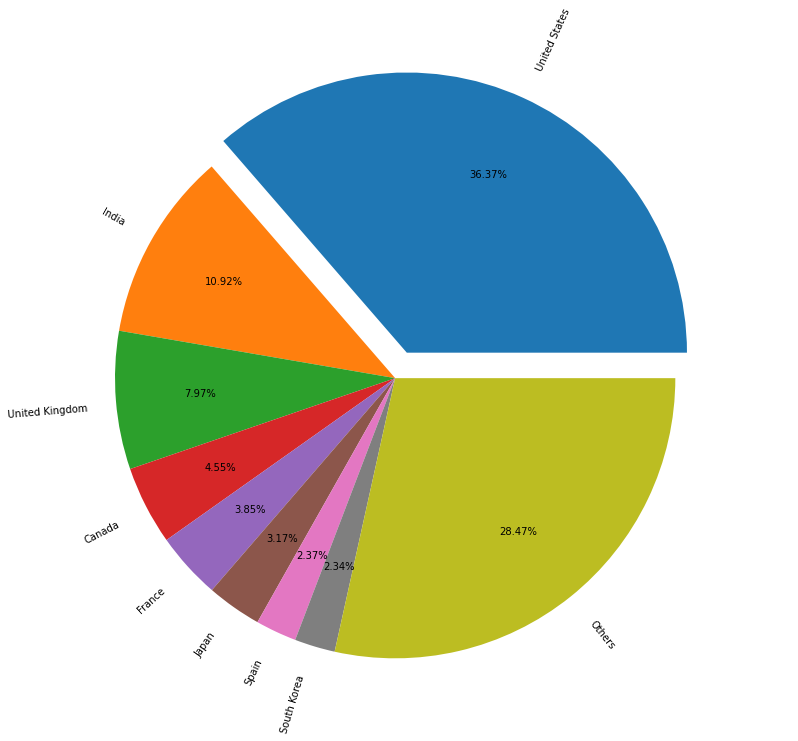

In [4]:
def seperate_commas(expression):
  return expression.split(', ')

def print_most_popular_country(df):
  #remove records with no country info
  countries = df.country.dropna().values
  #dictionary {country:amount of movies in that country}
  titles_by_country = {}

  for c in countries:
    for word in seperate_commas(c):
      if word not in titles_by_country.keys():
        #initialize its value
        titles_by_country[word] = 1
      else:
        #increase its value
        titles_by_country[word] = titles_by_country[word] + 1

  most_popular_country = max(titles_by_country, key=titles_by_country.get)
  print("Most popular country is " + str(most_popular_country) + " with " + str(titles_by_country[most_popular_country]) + " titles.")

  #create pie chart

  countries_list = []
  titles_list = []

  for x, y in titles_by_country.items():
      countries_list.append(x)
      titles_list.append(y)
  
  zipped = list(zip(countries_list, titles_list))
  zipped = sorted(zipped, key=lambda val: -val[1])
  
  countries_list, titles_list = list(zip(*zipped))
  countries_list = list(countries_list)
  titles_list = list(titles_list)

  countries_pie = countries_list[:8].copy()
  titles_pie = titles_list[:8].copy()

  explode = (0.1,0,0,0,0,0,0,0,0)
  countries_pie.append('Others')
  titles_pie.append(sum(titles_list[8:]))
  figure(figsize=(14, 12))
  plt.pie(titles_pie, labels=countries_pie,explode=explode, autopct='%.2f%%',pctdistance=0.7,rotatelabels=True,)
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.show()
  
print_most_popular_country(netflix_data)

### **Ερώτημα 4**

---

Για κάθε χώρα διατρέχονται όλοι οι τίτλοι της και εντοπίζονται τα διάφορα είδη αυτών

In [5]:
def titles_in_country(df, country):
  '''
  Returns a Dataframe with all titles in a given country
  '''
  filtered_data = df[df['country'].notnull()]
  return filtered_data.loc[filtered_data['country'].str.contains(country)]

def unique_items(df):
  #remove all records with null values
  raw_items = df.dropna().values
  items = []

  #creates a list with all the different categories
  for c in raw_items:
    for item in seperate_commas(c):
      if item not in items:
        items.append(item)
  return items

def all_categories(df):
  '''
  Returns a list with all categories in the given Dataframe
  '''
  return unique_items(df.listed_in)


countries = unique_items(netflix_data.country)

countries_categories = pd.DataFrame(columns = countries, index = all_categories(netflix_data))

for country in countries:
  all_categories_per_country = all_categories(titles_in_country(netflix_data, country))
  for listing in all_categories_per_country:
    countries_categories[country][listing] = '✓'

countries_categories = countries_categories.fillna(' ')
countries_categories.head(50)

,Brazil,Mexico,Singapore,United States,Turkey,Egypt,India,Poland,Thailand,Nigeria,Norway,Iceland,United Kingdom,Japan,South Korea,Italy,Canada,Indonesia,Romania,Spain,South Africa,France,Portugal,Hong Kong,China,Germany,Argentina,Serbia,Denmark,Kenya,New Zealand,Pakistan,Australia,Taiwan,Netherlands,Philippines,United Arab Emirates,Iran,Belgium,Israel,...,Cambodia,Albania,Cuba,Nicaragua,Greece,"Cambodia,",Croatia,Guatemala,West Germany,"Poland,",Slovenia,Dominican Republic,Nepal,Samoa,Azerbaijan,Bermuda,Ecuador,Georgia,Botswana,Puerto Rico,Iraq,Vatican City,Angola,Ukraine,Jamaica,Belarus,Cyprus,Kazakhstan,Malawi,Slovakia,Lithuania,Afghanistan,Paraguay,Somalia,Sudan,Panama,"United Kingdom,",Uganda,East Germany,Montenegro
International TV Shows,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,,✓,✓,✓,,✓,✓,✓,✓,,✓,,✓,✓,✓,✓,✓,✓,✓,,✓,✓,...,,,✓,,✓,,✓,,✓,✓,,,,,✓,,,,,✓,,,,✓,,,,,,,,,,,,,✓,,,
TV Dramas,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,,✓,✓,✓,,✓,✓,✓,✓,,✓,,✓,✓,✓,✓,✓,✓,✓,,✓,✓,...,,,,,,,✓,,✓,✓,,,,,✓,,,,,,,,,✓,,,,,,,,,,,,,✓,,,
TV Sci-Fi & Fantasy,✓,✓,✓,✓,,✓,✓,,✓,,,,✓,,,,✓,,,,,✓,,,✓,✓,,,,,✓,,✓,✓,,,,,✓,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,✓,,,
Dramas,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,...,✓,✓,,,✓,✓,✓,✓,,✓,✓,,✓,,,,,✓,,,,,,,✓,,,,✓,✓,✓,,,✓,✓,,✓,,,✓
International Movies,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,...,✓,✓,,,✓,✓,✓,✓,✓,✓,✓,✓,✓,,,,,✓,,,✓,✓,✓,✓,✓,,,,,✓,✓,✓,✓,,,,✓,,,✓
Horror Movies,,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,,✓,✓,✓,,,✓,✓,✓,✓,,,,✓,✓,✓,,✓,✓,✓,✓,✓,...,,,,,,,,,✓,✓,✓,✓,,,,,,,,,,,,,,,,,,,,,,,,,✓,,,
Action & Adventure,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,,✓,✓,✓,,✓,✓,✓,✓,✓,✓,,✓,✓,✓,✓,✓,✓,✓,,✓,✓,...,✓,,,,✓,,,,,,,,✓,,,,,,,,,,✓,,,,,,,,,,✓,,,,✓,,,
Independent Movies,✓,✓,✓,✓,✓,✓,✓,✓,,✓,✓,✓,✓,✓,✓,✓,✓,,,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,...,,,,,✓,,✓,✓,,✓,✓,,,,,,,✓,,,,,,,,,,,✓,,,,,,,,✓,,,
Sci-Fi & Fantasy,,✓,✓,✓,,,✓,✓,,,,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,,✓,✓,✓,✓,✓,,,✓,,✓,,✓,,✓,,✓,✓,...,✓,,,,✓,,,,,✓,✓,,,,,,,,,,,,,,,,,,,,,,,,,,✓,,,
TV Mysteries,✓,,,✓,✓,✓,✓,✓,✓,,✓,,✓,✓,✓,,✓,,,,✓,✓,,,✓,✓,,,✓,,,,✓,✓,,,,,✓,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,✓,,,


### **Ερώτημα 5**

---

Η συνάρτηση most_popular_actors επιστρέφει λίστα με τους πιο δημοφιλείς ηθοποιούς στο δοσμένο data frame. Η συγκεκριμένη συνάρτηση καλείται για κάθε χώρα με όρισμα ενα dataframe που αποτελείται μόνο απο τους τίτλους στους οποίους αυτή συμμετέχει

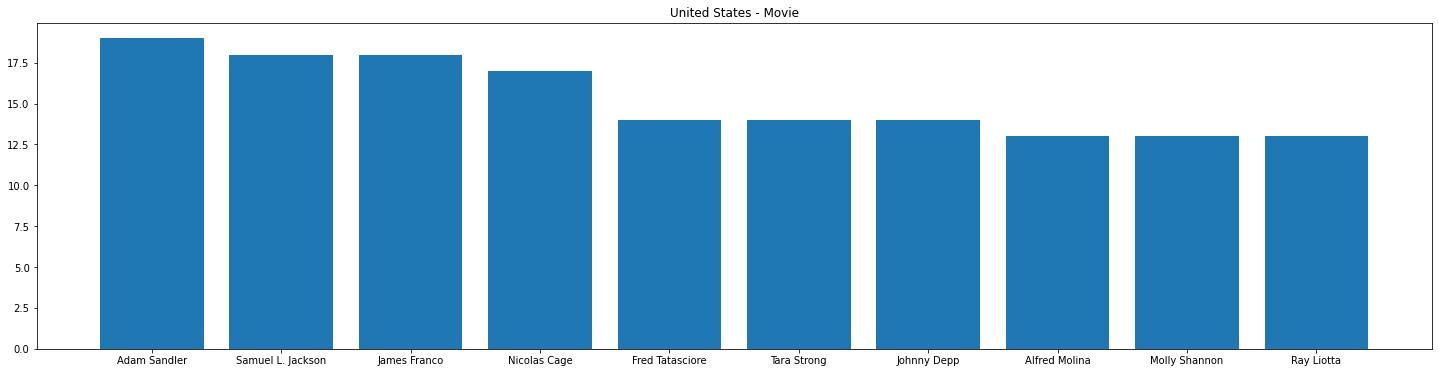

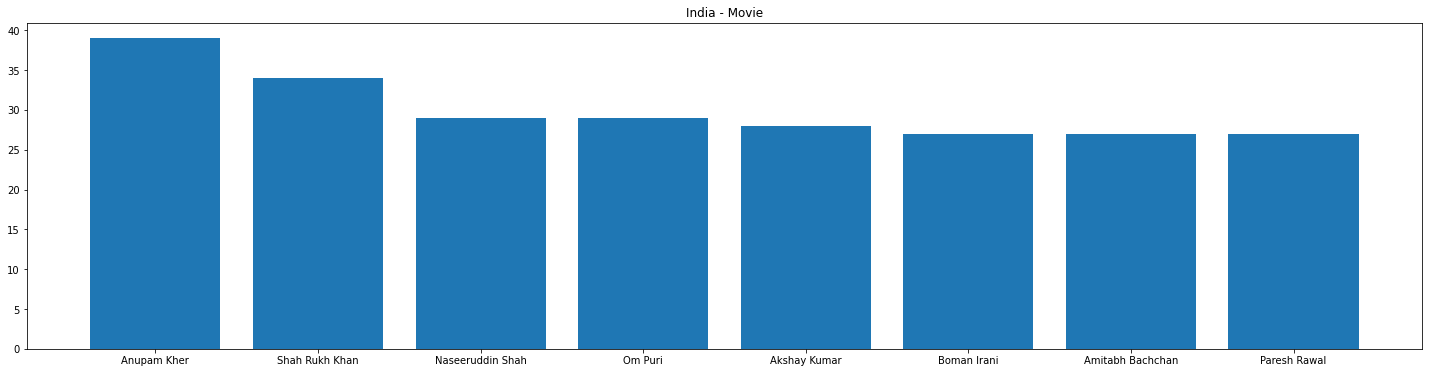

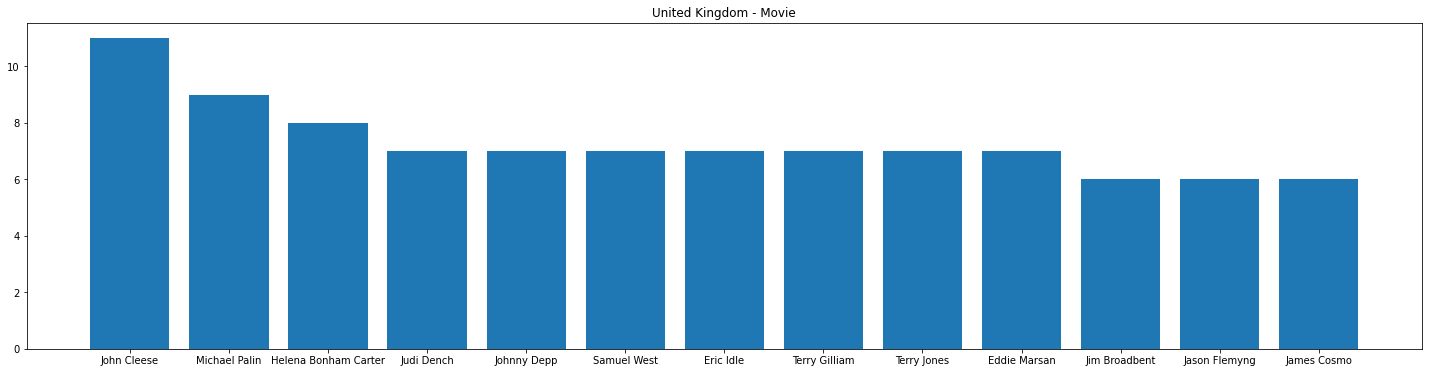

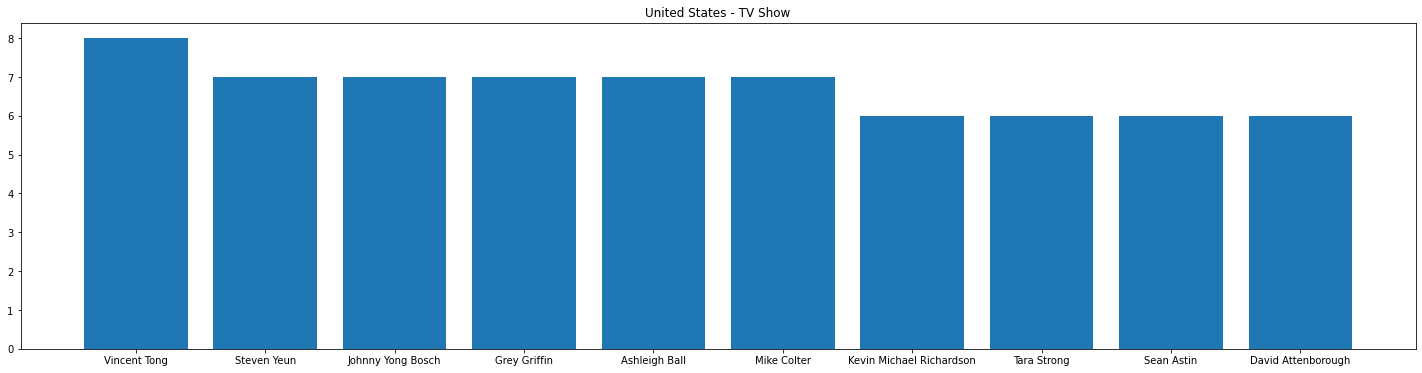

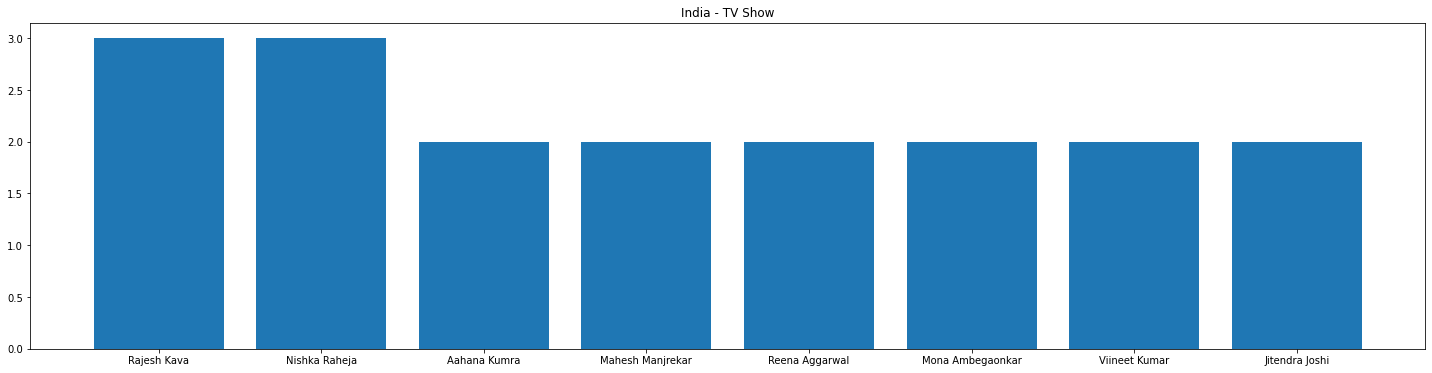

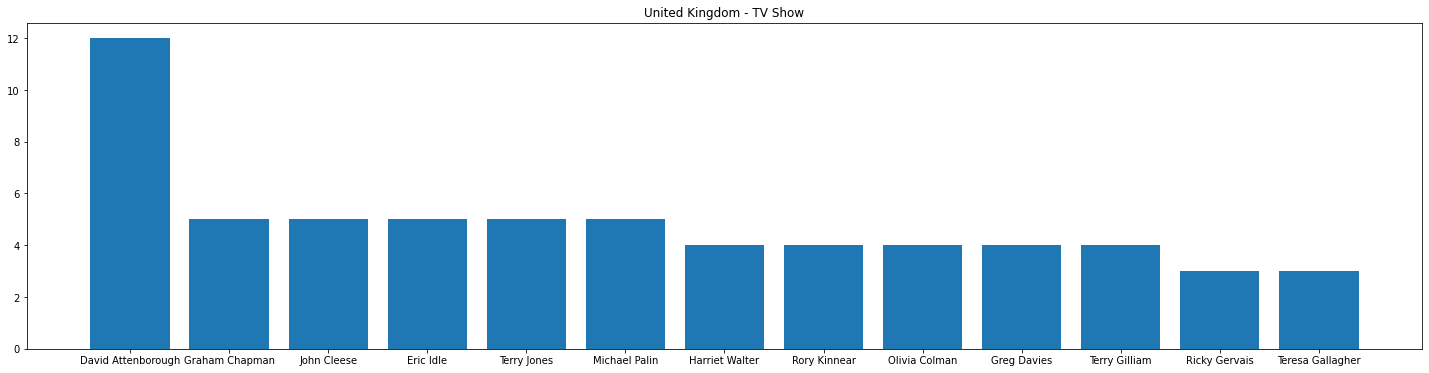

In [6]:
def most_popular_actors(df, n):
  actors = {}

  casts = df['cast']
  casts = casts.dropna()
  for c in casts:
    for actor in seperate_commas(c):
      if actor not in actors.keys():
        actors[actor] = 1
      else:
        actors[actor] +=1 
  actors = sorted(actors.items(), key=lambda x: -x[1])
  return actors[:n]

def plot_most_popular_actors(df,n, country, type):
  df = df[df.type == type]
  actors_tuple = most_popular_actors(df,n)
  if(len(actors_tuple)==0):
    print('No actors found')
    return
  actors, listings = map(list, zip(*actors_tuple))
  figure(figsize=(25, 6))
  plt.title(country + " - " + type)
  plt.bar(actors, listings)

def plot_most_popular_actors_per_coutry(df, country, n, type):
  plot_most_popular_actors(titles_in_country(df, country), n, country, type)  

#Creating some plots for some countries with various amount of top actors

#Movies
plot_most_popular_actors_per_coutry(netflix_data, 'United States', 10, 'Movie')
plot_most_popular_actors_per_coutry(netflix_data, 'India', 8, 'Movie')
plot_most_popular_actors_per_coutry(netflix_data, 'United Kingdom', 13, 'Movie')

#TV Shows
plot_most_popular_actors_per_coutry(netflix_data, 'United States', 10, 'TV Show')
plot_most_popular_actors_per_coutry(netflix_data, 'India', 8, 'TV Show')
plot_most_popular_actors_per_coutry(netflix_data, 'United Kingdom', 13, 'TV Show')


### **Ερώτημα 6**

---

Δημιουργούνται επιμέρους dataframes που αποτελούνται από τίτλους που αναφέρονται σε μία συγκεκριμένη ηλικακή κατηγορία και, στη συνέχεια, με την κλήση της μεταβλητής/μέλους shape υπολογίζεται το πλήθος εγγραφών σε κάθε ένα από αυτά

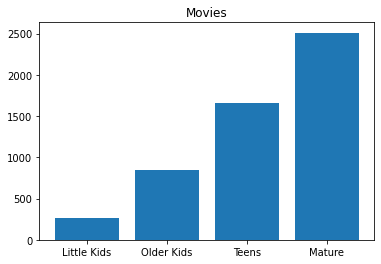

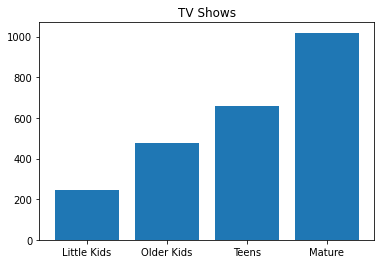

In [7]:
def plot_age_groups(df,title):
  little_kids = df[(df['rating']=='G')       |
                   (df['rating']=='TV-Y')    | 
                   (df['rating']=='TV-G')]

  older_kids = df[(df['rating']=='PG')       |
                  (df['rating']=='TV-Y7')    |
                  (df['rating']=='TV-Y7-FV') |
                  (df['rating']=='TV-PG')]

  teens = df[(df['rating']=='PG-13')         |
             (df['rating']=='TV-14')]

  mature = df[(df['rating']=='R')            |
              (df['rating']=='NC-17')        | 
              (df['rating']=='TV-MA')]

  labels = ['Little Kids', 'Older Kids', 'Teens', 'Mature']
  values = [little_kids.shape[0] - 1, older_kids.shape[0] - 1, teens.shape[0] - 1, mature.shape[0] - 1]

  plt.title(title)
  plt.bar(labels,values)
  plt.show()

plot_age_groups(netflix_data[netflix_data['type'] == 'Movie'],'Movies')
plot_age_groups(netflix_data[netflix_data['type'] == 'TV Show'],'TV Shows')

### **Ερώτημα 7** 

---

Το dataframe ομαδοποιείται μέσω της συνάρτησης groupby ανα μήνα και στη συνέχεια, αφού υπολογιστούν τα πλήθη τίτλων απο κάθε μήνα, εμφανίζονται σε διάγραμμα τύπου bar

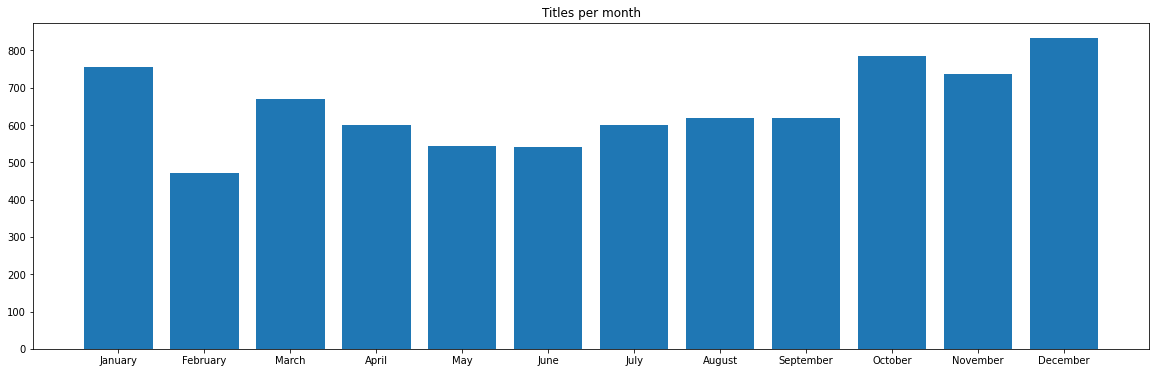

In [8]:
def plot_month_popularity(df):
  df_by_month = df.groupby(df['date_added'].str.split().str[0])
  titles_per_month = df_by_month['date_added'].count()

  months = ['January','February','March','April','May','June','July','August','September','October','November','December']
  month_count = []

  for month in months:
    month_count.append(titles_per_month.get(month))
  
  figure(figsize=(20, 6))
  plt.title('Titles per month')
  plt.bar(months, month_count)
  plt.show()

plot_month_popularity(netflix_data)

### **Ερώτημα 8**


---

Υπολογίζεται το πλήθος των τίτλων ανα κατηγορία και παρουσιάζεται με τη μορφή διαγράμματος τύπου bar


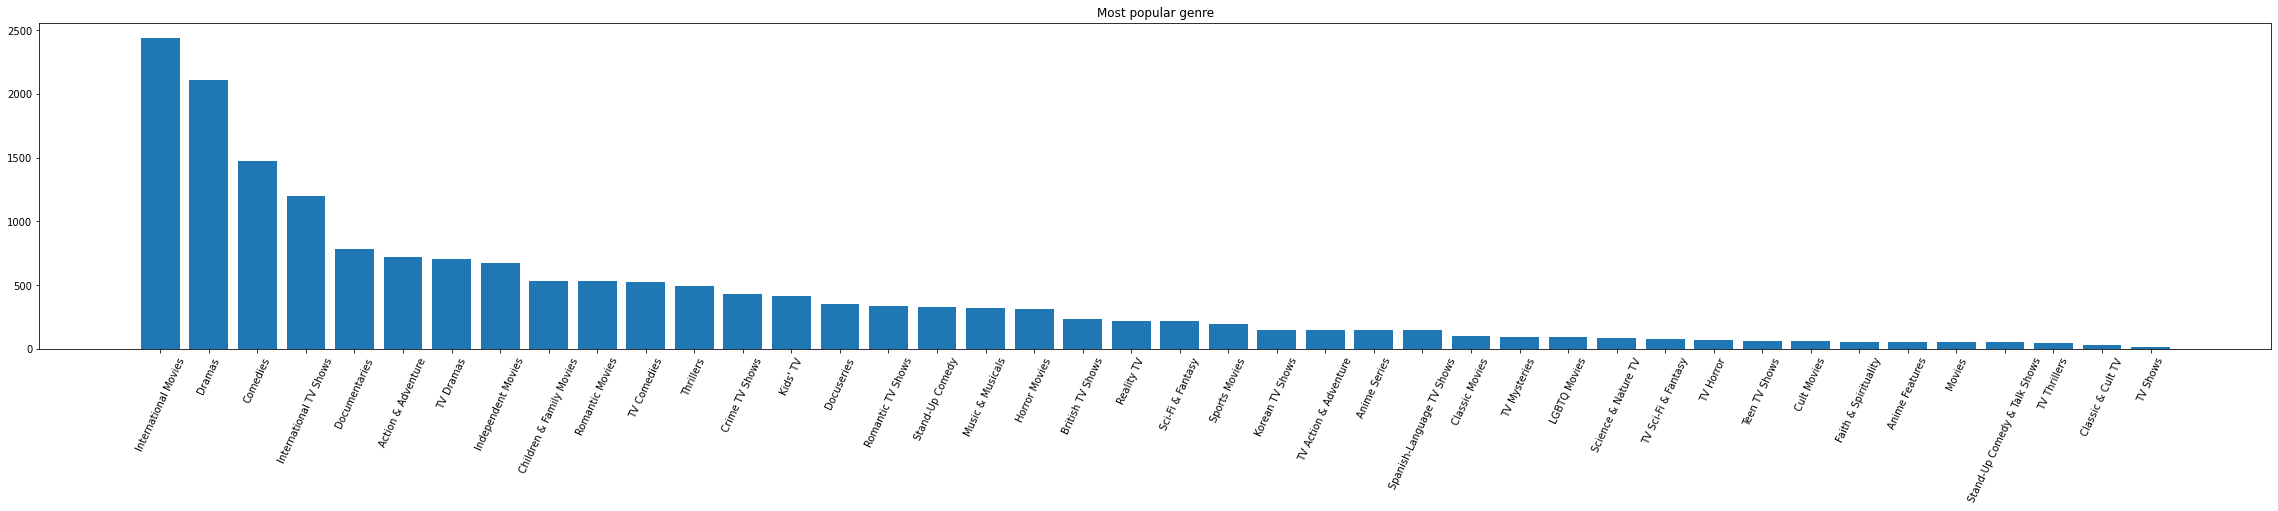

In [9]:
def titles_in_category(df, category):
  '''
  Returns a Series with all the titles that have this category
  '''
  filtered_data = df[df['listed_in'].notnull()]
  return filtered_data.loc[filtered_data['listed_in'].apply(lambda x: True if category in seperate_commas(x) else False)]


def plot_categories(df):
  categories = all_categories(df)
  categories_count = []
  for category in categories:
    categories_count.append(titles_in_category(df, category).shape[0] - 1)

  zipped = list(zip(categories, categories_count))
  zipped = sorted(zipped,key=lambda val: -val[1])
  categories,categories_count = list(zip(*zipped))
  
  figure(figsize=(40, 6))
  plt.title('Most popular genre')
  plt.bar(categories, categories_count)
  plt.xticks(rotation=65)
  plt.show()

plot_categories(netflix_data)

### **Ερώτημα 9** 

---

Η συνάρτηση most_popular_directors επιστρέφει λίστα με τους πιο δημοφιλείς σκηνοθέτες στο δοσμένο data frame. Η συγκεκριμένη συνάρτηση καλείται για κάθε χώρα με όρισμα ενα dataframe που αποτελείται μόνο απο τους τίτλους στους οποίους αυτή συμμετέχει


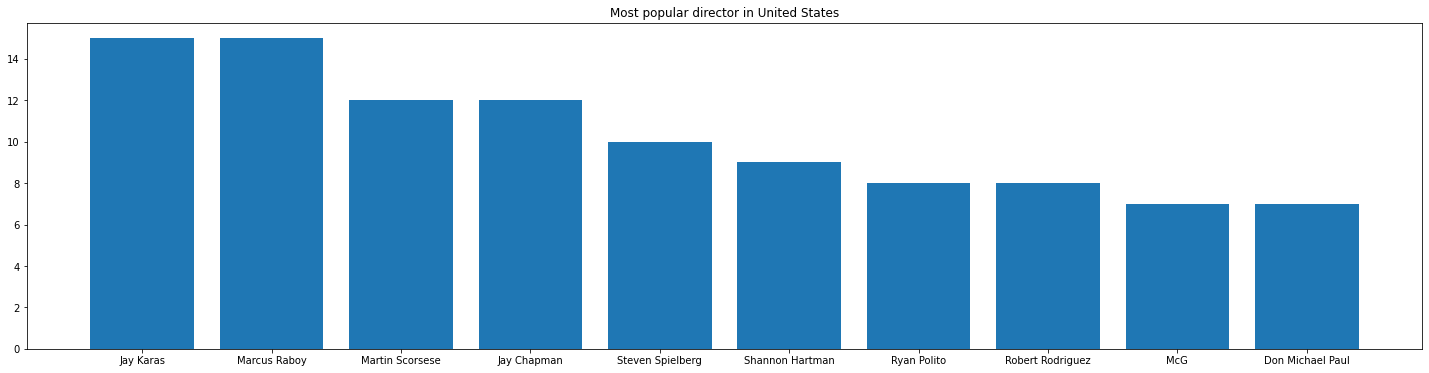

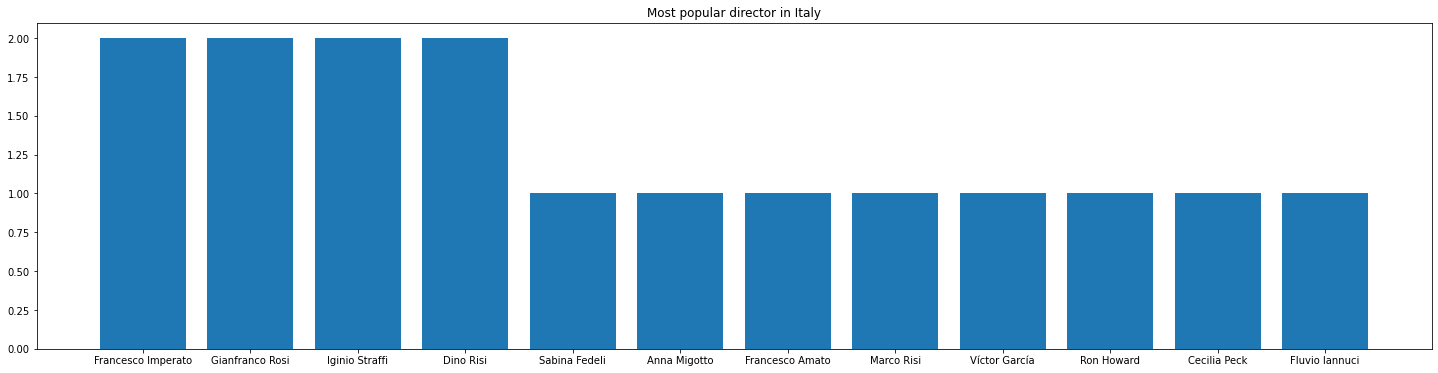

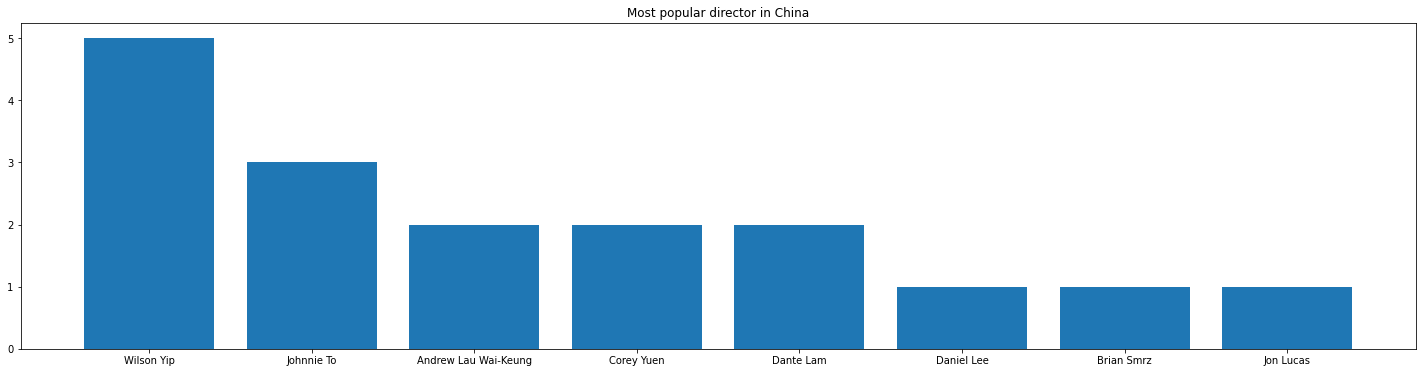

In [10]:
def most_popular_directors(df, n):
  directors_dict = {}

  directors = df['director']
  directors = directors.dropna()
  for d in directors:
    for director in seperate_commas(d):
      if director not in directors_dict.keys():
        directors_dict[director] = 1
      else:
        directors_dict[director] += 1 
  directors_list = sorted(directors_dict.items(), key=lambda x: -x[1])
  return directors_list[:n]

def plot_most_popular_directors(df,n, country):
  directors_tuple = most_popular_directors(df,n)
  if(len(directors_tuple)==0):
    print('No directors found')
    return
  directors, listings = map(list, zip(*directors_tuple))

  figure(figsize=(25, 6))
  plt.title('Most popular director in ' + country)
  plt.bar(directors, listings)

def plot_most_popular_directors_per_coutry(df, country, n):
  plot_most_popular_directors(titles_in_country(df, country), n, country)  

#Creating some plots for some countries with various amount of top directors
plot_most_popular_directors_per_coutry(netflix_data, 'United States', 10)
plot_most_popular_directors_per_coutry(netflix_data, 'Italy', 12)
plot_most_popular_directors_per_coutry(netflix_data, 'China', 8)

### **Ερώτημα 10**

---
Ύστερα από ομαδοποίηση του dataframe ανάλογα με τον αριθμό των seasons, υπολογίζονται τα πλήθη των τίτλων


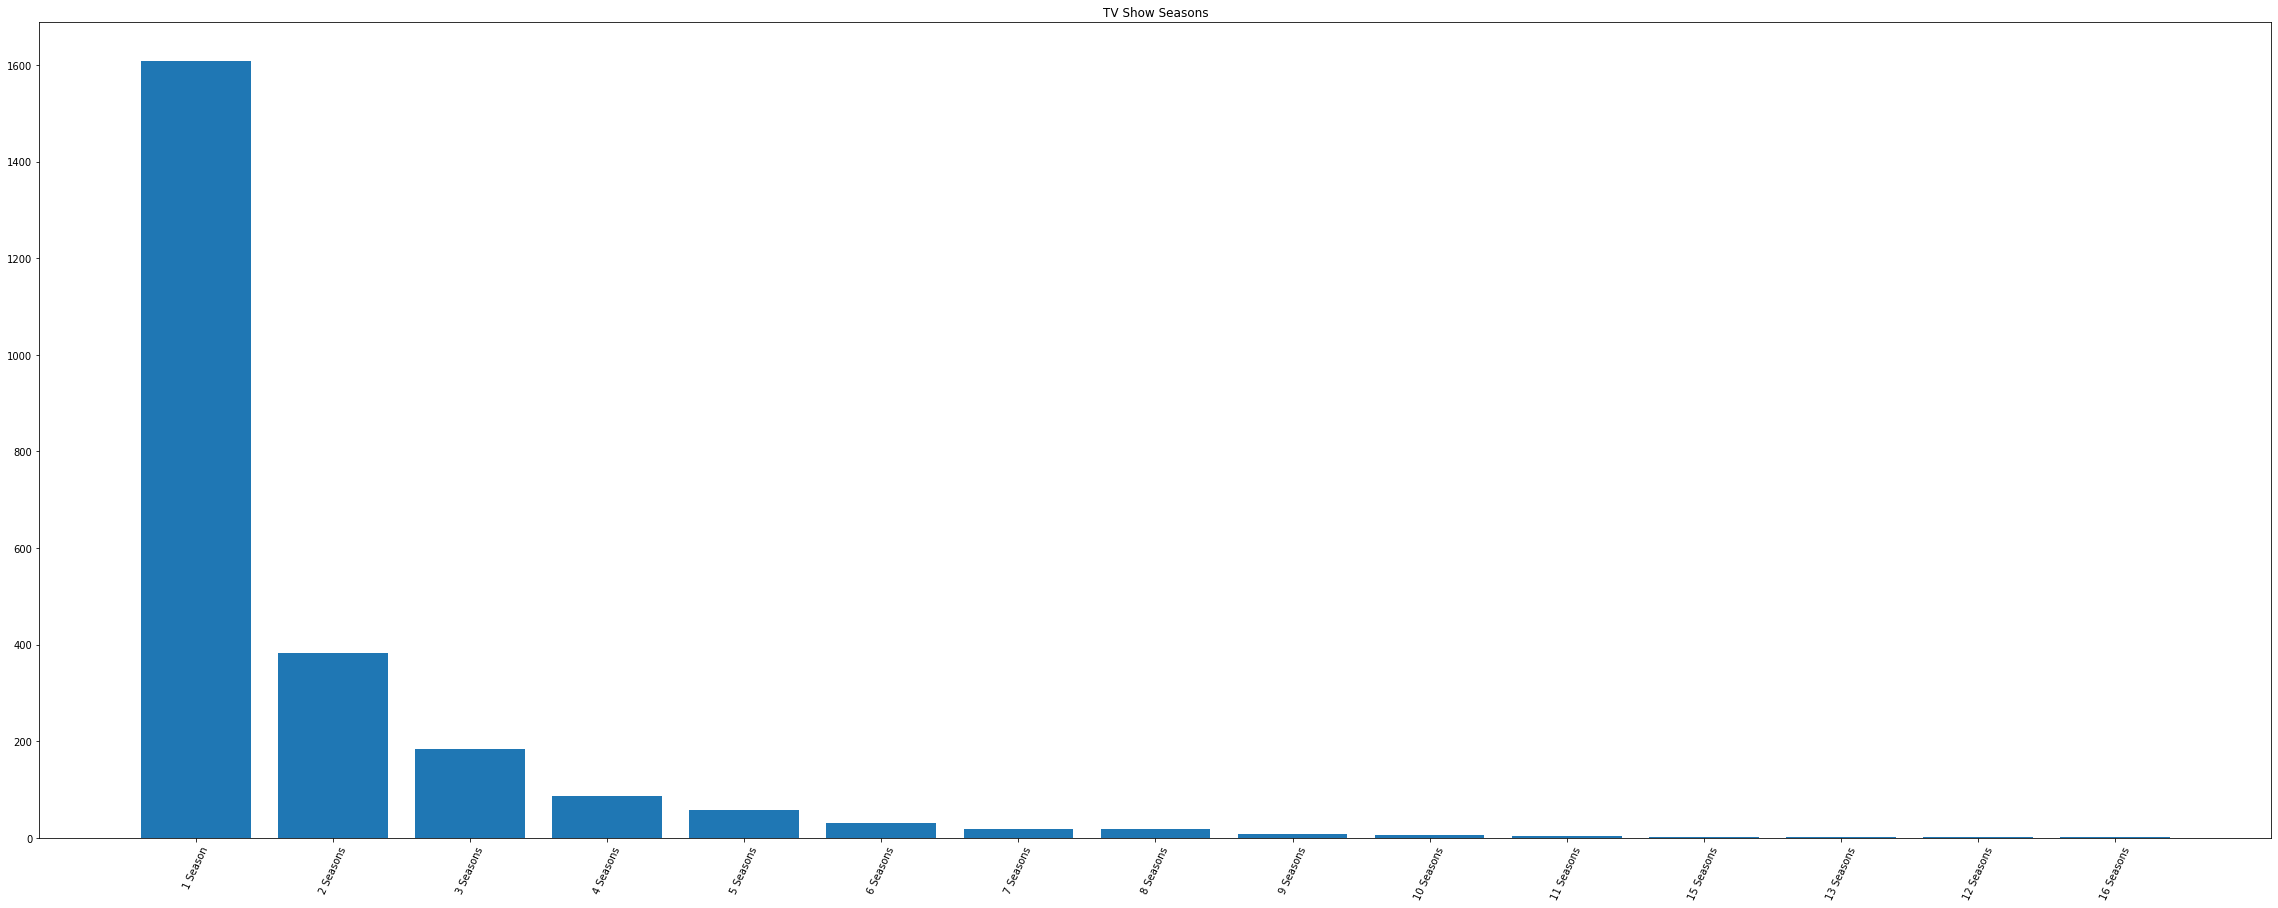

In [11]:
def plot_seasons(df):
  series = df[df['type']=='TV Show']
  series = series[series['duration'].notnull()]
  series = series.groupby('duration').count()
  series = series['show_id']

  series = series.sort_values(ascending=False)

  num_of_seasons = series.index.to_list()
  count = series.to_list()

  figure(figsize=(40, 15))
  plt.title('TV Show Seasons')
  plt.bar(num_of_seasons, count)
  plt.xticks(rotation=65)
  plt.show()

plot_seasons(netflix_data)

### **Ερώτημα 11**

---

Χρησιμοποιείται η συνάρτηση merge της pandas για να γίνουν τα απαραίτητα join και στη συνέχεια υπολογίζονται οι πιο δημοφιλείς ταινίες χρησιμοποιώντας το πεδίο weighted_average_vote, ύστερα από φιλτράρισμα των ταινιών που έχουν μικρό αριθμό κριτικών (μία ταινία που έχει ελάχιστες αλλά πολύ καλές κριτικές, δεν είναι εφικτό να εξασφαλιστεί η απόλυτη αξιοπιστία των κριτικών αυτών)

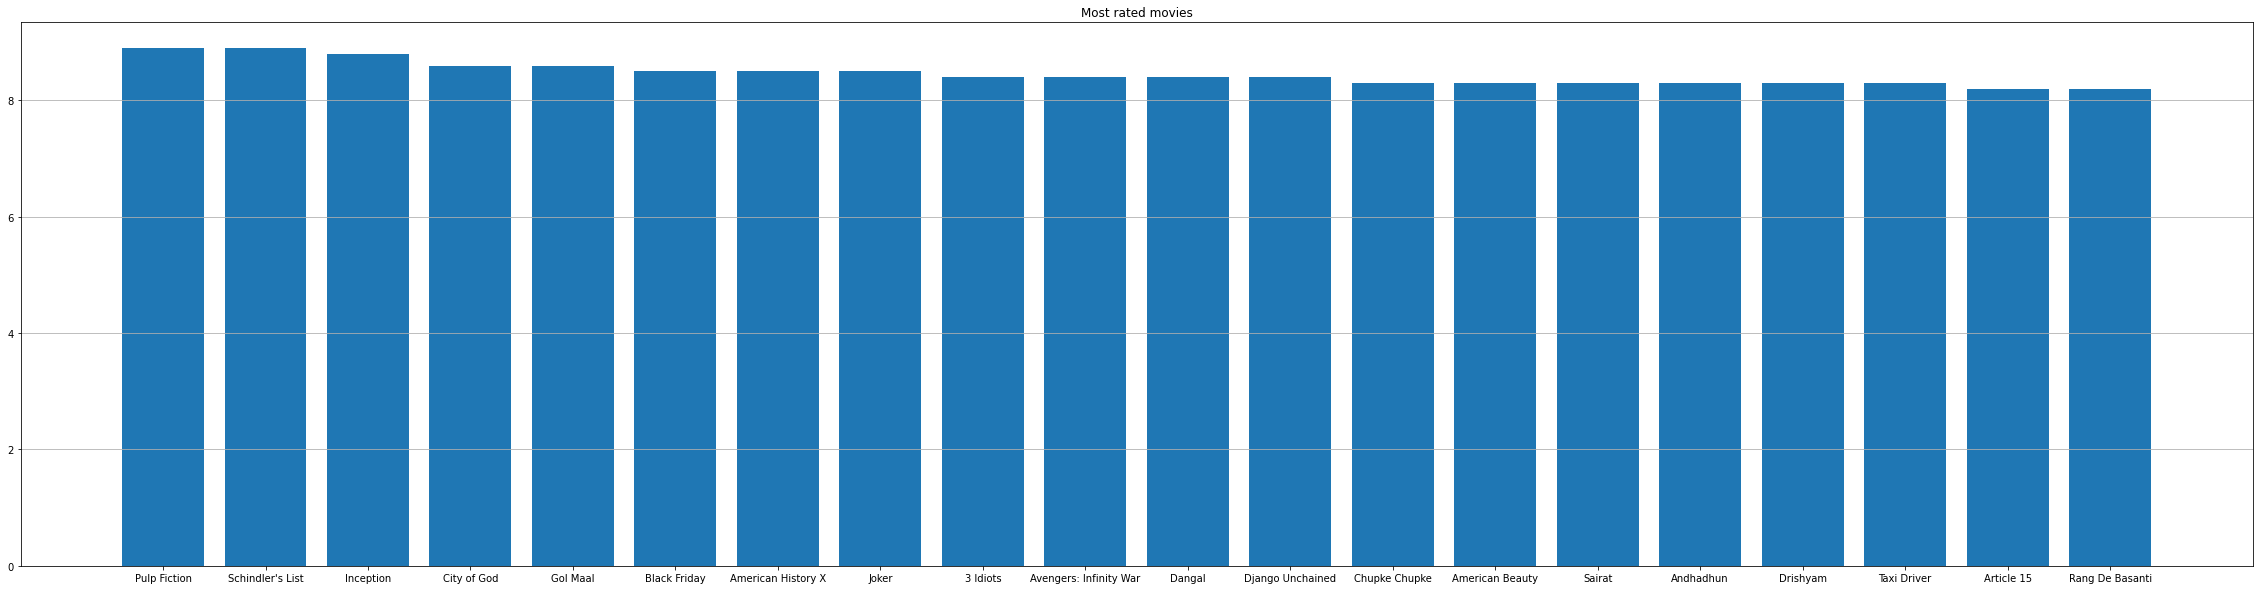

In [12]:
threshold = 10000

imdb_data = pd.read_csv("IMDb movies.csv",low_memory=False)
imdb_ratings = pd.read_csv("IMDb ratings.csv")

netflix_movies_data = netflix_data[netflix_data['type'] == 'Movie']

#Join imdb data with netflix data
imdb_data_ratings = pd.merge(imdb_data, imdb_ratings, how="left", on=["imdb_title_id", "imdb_title_id"])
imdb_data_ratings = imdb_data_ratings[['imdb_title_id','title','weighted_average_vote','total_votes']]
imdb_data_ratings.sort_values('weighted_average_vote')
netflix_imdb_data = pd.merge(netflix_movies_data, imdb_data_ratings, how="left", on=["title", "title"])
netflix_imdb_data = netflix_imdb_data.sort_values('weighted_average_vote', ascending=False)
netflix_imdb_data = netflix_imdb_data[netflix_imdb_data['total_votes'] >= threshold]
netflix_imdb_data.head(10)

figure(figsize=(40, 10))
plt.title('Most rated movies')
plt.grid(axis = 'y')
plt.bar(netflix_imdb_data['title'].head(20), netflix_imdb_data['weighted_average_vote'].head(20))
plt.show()

## **Recommendation System**

### **Ερώτημα 1**

---

Δημιουργία των count vector αναπαραστάσεων των τίτλων/περιγραφών σε Boolean Βag of Words και σε Term Frequency - Inverse Document Frequency

In [13]:
from sklearn.feature_extraction.text import *
import gc

gc.collect()

descs = (netflix_data['title'] + ' ' + netflix_data['description']).tolist()  #both titles and descriptions are used for counting similarity

#create the count vectorizers

vec_bow_uni = CountVectorizer(ngram_range = (1,1), binary = True, min_df = 0.001, max_df = 0.09)
vec_bow_bi = CountVectorizer(ngram_range = (2,2), binary = True, min_df = 0.001, max_df = 0.1)
vec_tf_uni = CountVectorizer(ngram_range = (1,1), binary = False, max_features = 10000, max_df =0.1)
vec_tf_bi = CountVectorizer(ngram_range = (2,2), binary = False, max_features = 10000, max_df =0.1)

#fit descriptions/titles and transform to boolean bow and tf-idf

vec_bow_uni.fit(descs)
bow_uni = vec_bow_uni.transform(descs)

vec_bow_bi.fit(descs)
bow_bi = vec_bow_bi.transform(descs)

vec_tf_uni.fit(descs)
tf_uni = vec_tf_uni.transform(descs)

vec_tf_bi.fit(descs)
tf_bi = vec_tf_bi.transform(descs)

#turn boolean bow and tf-idf to data frames for easier handling

df_bow_uni = pd.DataFrame(bow_uni.toarray())
df_bow_bi = pd.DataFrame(bow_bi.toarray())
df_tf_uni = pd.DataFrame(tf_uni.toarray())
df_tf_bi = pd.DataFrame(tf_bi.toarray())

netflix_titles = netflix_data[['show_id','title']]

gc.collect()

#The final dataframes used containing showID titles and bow/tf-idf
df_bow_uni = pd.concat([netflix_titles, df_bow_uni], axis = 1)
df_bow_bi  = pd.concat([netflix_titles, df_bow_bi],  axis = 1)
df_tf_uni  = pd.concat([netflix_titles, df_tf_uni],  axis = 1)
df_tf_bi   = pd.concat([netflix_titles, df_tf_bi],   axis = 1)

### **Ερώτημα 2**

---
Υπολογισμός των πινάκων ομοιότητας με τη μέθοδο του Jaccard/Tanimoto coefficient και του Cosine Similarity


In [14]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard

#calculate jaccard/tanimoto similarity table (for both unigrams and bigrams) and turn to data frame

result_uni =  pdist(df_bow_uni.drop(['show_id', 'title'], 1), 'jaccard')
bow_uni_jaccard = pd.DataFrame(squareform(result_uni), columns = df_bow_uni['title'], index = df_bow_uni['title'])
bow_uni_jaccard = 1 - bow_uni_jaccard


result_bi =  pdist(df_bow_bi.drop(['show_id', 'title'], 1), 'jaccard')
bow_bi_jaccard = pd.DataFrame(squareform(result_bi), columns = df_bow_bi['title'], index = df_bow_bi['title'])
bow_bi_jaccard = 1 - bow_bi_jaccard

bow_uni_jaccard.head()  #to view the result (similarity table)

title,3%,7:19,23:59,9,21,46,122,187,706,1920,1922,1983,1994,"2,215",3022,Oct-01,Feb-09,22-Jul,15-Aug,'89,​​Kuch Bheege Alfaaz,​Goli Soda 2,​Maj Rati ​​Keteki,​Mayurakshi,​SAINT SEIYA: Knights of the Zodiac,(T)ERROR,(Un)Well,#Alive,#AnneFrank - Parallel Stories,#blackAF,#cats_the_mewvie,#FriendButMarried,#FriendButMarried 2,#realityhigh,#Roxy,#Rucker50,#Selfie,#Selfie 69,แผนร้ายนายเจ้าเล่ห์,"¡Ay, mi madre!",...,اشتباك,الف مبروك,Yu-Gi-Oh!,Yu-Gi-Oh! Arc-V,Yucatán,Yummy Mummies,Yunus Emre,Yuva,Z Nation,Z4,Zach Galifianakis: Live at the Purple Onion,Zack and Miri Make a Porno,Zak Storm,Zaki Chan,Zapped,Zed Plus,Zenda,Zero,Zero Hour,Zig & Sharko,Zindagi Gulzar Hai,Zindagi Kitni Haseen Hay,Zindagi Na Milegi Dobara,Zinzana,Zion,Zipi & Zape y la Isla del Capitan,Zoé: Panoramas,Zodiac,Zoids Wild,Zokkomon,Zombie Dumb,Zombieland,Zona Rosa,Zoo,Zoom,Zozo,Zubaan,Zulu Man in Japan,Zumbo's Just Desserts,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3%,1.000000,0.0,0.035714,0.000000,0.000000,0.0,0.000000,0.027027,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.05,0.0,0.0,0.000000,0.0,0.041667,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.037037,0.071429,0.000000,0.0,0.041667,0.000000,0.034483,0.000000,0.0,0.0,0.0,0.080000,0.0,0.0,0.000000,0.043478,0.0,0.074074,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.0,0.0,0.000000,0.000000,0.0,0.0
7:19,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.052632,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.037037,0.034483,0.0,0.0,0.0,0.0,0.000000,0.045455,0.0,0.0,0.066667,0.037037,0.04,0.0,0.000000,0.00,0.0,0.0,0.035714,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.038462,0.090909,0.035714,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.032258,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.035714,0.037037,0.000000,0.041667,0.000000,0.0,0.0,0.033333,0.071429,0.0,0.0
23:59,0.035714,0.0,1.000000,0.000000,0.000000,0.0,0.033333,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.000000,0.034483,0.000000,...,0.038462,0.0,0.038462,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.031250,0.033333,0.0,0.0,0.0,0.034483,0.0,0.0,0.000000,0.000000,0.0,0.032258,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.0,0.0,0.000000,0.000000,0.0,0.0
9,0.000000,0.0,0.000000,1.000000,0.095238,0.0,0.038462,0.000000,0.0,0.000000,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.041667,0.052632,0.0,0.0,0.035714,0.000000,0.00,0.0,0.071429,0.00,0.0,0.0,0.000000,0.0,0.000000,0.040000,0.040000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.040000,0.000000,0.0,0.000000,0.035714,0.000000,0.0,0.000000,0.040000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.033333,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.0,0.0,0.037037,0.000000,0.0,0.0
21,0.000000,0.0,0.000000,0.095238,1.000000,0.0,0.000000,0.028571,0.0,0.043478,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.037037,0.000000,0.00,0.0,0.035714,0.00,0.0,0.0,0.041667,0.0,0.000000,0.000000,0.041667,...,0.000000,0.0,0.000000,0.000000,0.000000,0.041667,0.058824,0.0,0.000000,0.037037,0.052632,0.0,0.000000,0.041667,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

#calculate cosine similarity table (for both unigrams and bigrams) and turn to data frame

tf_uni_cos = cosine_similarity(df_tf_uni.drop(['show_id', 'title'], 1))
tf_uni_cos = pd.DataFrame(tf_uni_cos)
tf_uni_cos.columns = df_tf_uni['title']
tf_uni_cos = tf_uni_cos.set_index(df_tf_uni['title'])

tf_bi_cos = cosine_similarity(df_tf_bi.drop(['show_id', 'title'], 1))
tf_bi_cos = pd.DataFrame(tf_bi_cos)
tf_bi_cos.columns = df_tf_bi['title']
tf_bi_cos = tf_bi_cos.set_index(df_tf_bi['title'])

tf_uni_cos.head() #to view the result (similarity table)

title,3%,7:19,23:59,9,21,46,122,187,706,1920,1922,1983,1994,"2,215",3022,Oct-01,Feb-09,22-Jul,15-Aug,'89,​​Kuch Bheege Alfaaz,​Goli Soda 2,​Maj Rati ​​Keteki,​Mayurakshi,​SAINT SEIYA: Knights of the Zodiac,(T)ERROR,(Un)Well,#Alive,#AnneFrank - Parallel Stories,#blackAF,#cats_the_mewvie,#FriendButMarried,#FriendButMarried 2,#realityhigh,#Roxy,#Rucker50,#Selfie,#Selfie 69,แผนร้ายนายเจ้าเล่ห์,"¡Ay, mi madre!",...,اشتباك,الف مبروك,Yu-Gi-Oh!,Yu-Gi-Oh! Arc-V,Yucatán,Yummy Mummies,Yunus Emre,Yuva,Z Nation,Z4,Zach Galifianakis: Live at the Purple Onion,Zack and Miri Make a Porno,Zak Storm,Zaki Chan,Zapped,Zed Plus,Zenda,Zero,Zero Hour,Zig & Sharko,Zindagi Gulzar Hai,Zindagi Kitni Haseen Hay,Zindagi Na Milegi Dobara,Zinzana,Zion,Zipi & Zape y la Isla del Capitan,Zoé: Panoramas,Zodiac,Zoids Wild,Zokkomon,Zombie Dumb,Zombieland,Zona Rosa,Zoo,Zoom,Zozo,Zubaan,Zulu Man in Japan,Zumbo's Just Desserts,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3%,1.000000,0.0,0.062622,0.000000,0.000000,0.0,0.000000,0.045644,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.074536,0.0,0.0,0.000000,0.0,0.069007,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.062622,0.115470,0.000000,0.0,0.06455,0.000000,0.053838,0.000000,0.0,0.0,0.0,0.129099,0.0,0.0,0.000000,0.066667,0.0,0.121716,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.062622,0.0,0.0,0.000000,0.000000,0.0,0.0
7:19,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.083333,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.058926,0.055556,0.0,0.0,0.0,0.0,0.00000,0.046225,0.0,0.0,0.111111,0.057166,0.068041,0.0,0.000000,0.000000,0.0,0.0,0.058926,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.058926,0.130744,0.058926,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.049147,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.055556,0.055556,0.000000,0.062994,0.000000,0.0,0.0,0.057166,0.114332,0.0,0.0
23:59,0.062622,0.0,1.000000,0.000000,0.000000,0.0,0.062622,0.000000,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.057166,0.000000,...,0.070014,0.0,0.060634,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.050572,0.058824,0.0,0.0,0.0,0.060634,0.0,0.0,0.000000,0.000000,0.0,0.057166,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.0,0.0,0.000000,0.000000,0.0,0.0
9,0.000000,0.0,0.000000,1.000000,0.133631,0.0,0.064550,0.000000,0.0,0.000000,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.06455,0.049029,0.0,0.0,0.058926,0.000000,0.000000,0.0,0.104257,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.058926,0.058926,...,0.000000,0.0,0.000000,0.000000,0.000000,0.062500,0.000000,0.0,0.000000,0.055902,0.000000,0.0,0.00000,0.064550,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.054554,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.072169,0.000000,0.000000,0.0,0.0,0.060634,0.000000,0.0,0.0
21,0.000000,0.0,0.000000,0.133631,1.000000,0.0,0.000000,0.047246,0.0,0.071429,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.062994,0.000000,0.000000,0.0,0.055728,0.000000,0.0,0.0,0.066815,0.0,0.000000,0.000000,0.062994,...,0.000000,0.0,0.066815,0.000000,0.000000,0.066815,0.071429,0.0,0.000000,0.059761,0.050508,0.0,0.00000,0.069007,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.069007,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


### **Ερώτημα 3**

---

Συνάρτηση που υπολογίζει τους n πιο σχετικούς τίτλους με βάση τους παραπάνω πίνακες ομοιότητας και επιστρέφει τα αποτελέσματα είτε σε dataframe είτε σε λίστα. Τα υπόλοιπα ορίσματα καθορίζουν τις μεθοδους υπολογισμού ομοιότητας που θα χρησιμοποιηθούν

In [64]:
def most_relative_titles(title, n, method = 'tf-idf', type = 'uni', ret = 'df'):
  if method == 'tf-idf':
    if type == 'uni':
      v  = tf_uni_cos
    elif type == 'bi':
      v  = tf_bi_cos
  elif method == 'bow':
    if type == 'uni':
      v  = bow_uni_jaccard
    elif type == 'bi':
      v  = bow_bi_jaccard
  else:
    pass
  titles = v[title]
  titles = titles.sort_values(ascending=False)
  most_relative = []
  for i in range(1,n+1):
    most_relative.append(titles.index[i])
  if (ret == 'df'):
    return pd.DataFrame(most_relative, columns = ['Title'])
  elif (ret == 'list'):
    return most_relative
  else:
    return None

**Δημιουργία Dictionary**

In [72]:
relevant_movies_dict = {}

#iterate all titles while importing their 100 most relevant titles to the dictionary

for title in netflix_data['title']:
  relevant_movies_dict[title] = most_relative_titles(title, 100, ret = 'list')

relevant_movies_df = pd.DataFrame.from_dict(relevant_movies_dict,orient='index')  #convert to DataFrame for ease of presentation
relevant_movies_df = relevant_movies_df.sample(frac = 1)  #randomize order to see results for random movies

relevant_movies_df.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
Oct-01,Thorne: Sleepyhead,Die Ontwaking,Beneath the Leaves,Black Rose,Wives on Strike,War Against Women,Killer Ratings,Killer Women with Piers Morgan,Uriyadi 2,Ghayal,The Plagues of Breslau,Manu,Cairo Station,Awake,Shuddhi,OCTB,3 Seconds Divorce,Harishchandrachi Factory,Beyond the Boundary: ICC Women's T20 World Cup...,Fifty,Good Girls,The Valhalla Murders,Avengement,Against the Tide,Kurtulus Son Durak,Tremors 5: Bloodline,Rebellion,In the Shadow of the Moon,The Frankenstein Chronicles,Soni,Skiptrace,Kiss the Girls,Journey of an African Colony,Million Yen Women,Interview with a Serial Killer,Elles étaient en guerre 1939-1945,Surviving R. Kelly,Mindhorn,The First Wives Club,Period. End of Sentence.,...,20th Century Women,Somewhere Between,Trigger Warning with Killer Mike,Noddy Toyland Detective,The Death and Life of Marsha P. Johnson,Night Stalker: The Hunt for a Serial Killer,Conversations with a Killer: The Ted Bundy Tapes,WHAT DID JACK DO?,Lechmi,The First Line,Bewildered Bolbol,The Arbitration,Rugal,Fallet,Thieves of the Wood,Two Catalonias,Deadwind,Shattered Memories,Vizontele Tuuba,This Evening,Rencor tatuado,Deathgrip,MANK,Peasants Rebellion,Thumper,Incorruptible,Kulipari: An Army of Frogs,The Sinner,The Cell,The Jungle School,The Killer,Soekarno,Blind Detective,Viceroy's House,Kis Kisko Pyaar Karoon,Saavat,Behzat Ç.,Signal,Two Graves,마녀사냥
Wet Hot American Summer: Ten Years Later,Wet Hot American Summer,The Last Summer,Malibu Rescue,Before the Summer Crowds,The Perfect Picture: Ten Years Later,12 Years Promise,How to Make an American Quilt,Judy Moody and the Not Bummer Summer,City of God: 10 Years Later,Porto,A Fairly Odd Summer,Thriller,The Drowning,A Go! Go! Cory Carson Summer Camp,Scary Movie,Organize Isler,King Jack,An American in Madras,Back of the Net,Be with Me,Barbie Dreamhouse Adventures: Go Team Roberts,Miss Julie,Fireworks,3 Heroines,Star Men,Good Kids,The Ballad of Buster Scruggs,American Anarchist,Princess Cyd,Summertime,Çok Filim Hareketler Bunlar,Yeh Meri Family,Good Hair,Look Who's Back,Lovesong,Now and Then,Guzaarish,In Line,Sunny Bunnies,Exes Baggage,...,Children of the Sea,On the Wrong Track,6 Years,The Chalet,26 Years,Wild Wild West,Unexpectedly Yours,Into the Wild,Dilwale,Shelby American,Refresh Man,American Crime,100 Years: One Woman's Fight for Justice,American Factory,Kara Bela,American Experience: The Circus,An Easy Girl,The Adventures of Puss in Boots,Rim of the World,Crip Camp: A Disability Revolution,Black Summer,Magic Phone,Pretty Man,Under the Riccione Sun,Hotel Transylvania 3: Summer Vacation,The Amityville Horror,Puss in Book: Trapped in an Epic Tale,Growing Up Wild,The Adventures of Tintin,Gang of the Caribbean,El fin de ETA,The Magic School Bus Rides Again,H2O: Mermaid Adventures,Summer of '92,Mismatched,Camp Cool Kids,Free Rein,My Girl,The American Barbecue Showdown,Metallica: Some Kind of Monster
Be with You,Yes or No 2.5,Show Me the Money,You're My Destiny,No Good Nick,Sameer Abu Alneel,To All the Boys I’ve Loved Before,Fanatic,Mohamed Hussein,Below Her Mouth,Half & Half,Planetarium,Black Hawk Down,5 to 7,The Bonfire of Destiny,Mubarakan,Pagpag: Nine Lives,Backfire,No Reservations,The Do-Over,The Witch: Part 1 - The Subversion,Miss J Contemplates Her Choice,"Hello, Love, Goodbye",Bedtime Stories,Salem: His Sister's Father,แผนร้ายนายเจ้าเล่ห์,Bombairiya,Shor In the City,The Lobster,White Christmas,Can You Hear Me?,The Miracle,Christmas Wedding Planner,The Forest of Love,Queer Eye: We're in Japan!,Sisters,20th Century Women,The Mitfords: A Tale of Two Sisters,Mike Birbiglia: My Girlfriend's Boyfriend,Braxton Family Values,Almost Love,...,Race,Match,Whisky,Like Arrows,Familiye,Big Mouth,See You in Time,Wrong No.,And Breathe Normally,Romeo Ranjha,Wish You,Ba

### **Παραδείγματα**

In [58]:
most_relative_titles("Platoon", 15)

,Title
0,Kraftidioten
1,The Rehearsal
2,The Last Face
3,The Squid and the Whale
4,The Vietnam War: A Film by Ken Burns and Lynn ...
5,War Horse
6,The Death of Mr. Lazarescu
7,Shabd
8,Mantostaan
9,Love Ni Bhavai


In [60]:
most_relative_titles("Narcos", 15, method = "bow")

,Title
0,El Chapo
1,Narcos: Mexico
2,The Sky Is Pink
3,Bad Blood
4,Cocaine
5,Sin senos no hay paraíso
6,Gabriel and the Mountain
7,I Am Michael
8,"Extremely Wicked, Shockingly Evil and Vile"
9,Historia de un clan


**Σχολιασμός Αποτελεσμάτων**

---
Γενικά, οι διαφοροποιήσεις στα αποτέλεσματα μεταξύ των δύο μεθόδων οφείλονται στο γεγονός ότι ο tf-idf λαμβάνει υπόψη όχι μόνο ποιες λέξεις υπάρχουν, αλλά και πόσες φορές. Αυτό δεν είναι απαραίτητα καλύτερο, σε όλες τις περιπτώσεις, μας δίνει όμως μια διαφορετική οπτική γωνία στα αποτελέσματα


### **Ερώτημα 4**

---

Ανάλογη λειτουργία με την παραπάνω συνάρτηση με τη διαφορά ότι εδώ το κείμενο που δίνεται ως παράμετρος μετατρέπεται σε count vector και καλούνται οι συναρτήσεις ομοιότητας μεταξύ αυτού και όλων των τίτλων που υπάρχουν στη βάση

In [40]:
from sklearn.metrics import jaccard_similarity_score

def get_similar_movies2(text, N=10, method = 'tf-idf', type = 'uni'):
  text = [text]
  if method == 'tf-idf':
    if type=='uni':
      cv = vec_tf_uni
      v  = tf_uni
    elif type=='bi':
      cv = vec_tf_bi
      v  = tf_bi
    text_tf = cv.transform(text)
    similarities = cosine_similarity(text_tf, v.toarray())[0]
  elif method == 'bow':
    if type=='uni':
      cv = vec_bow_uni
      v  = bow_uni
    elif type=='bi':
      cv = vec_bow_bi
      v  = bow_bi
    text_bow = cv.transform(text)
    
    similarities = []
  
    for i in v:
      similarity = jaccard_similarity_score(text_bow.toarray(),i)
      similarities.append(similarity)
  else:
    print('Unknown type - Only uni or bi allowed')
    return None


 
  indexed_list = []
  i = -1
  for value in similarities:
    i = i + 1
    if value < 0.0001:    # don't include titles with almost zero similarity
      continue
    else:
      indexed_list.append((i,value))

  sorted_indexed_list = sorted(indexed_list, key=lambda tup: -tup[1])

  sorted_indexed_list = sorted_indexed_list[:N]

  best_movie_titles = []
  for item in sorted_indexed_list:
    best_movie_titles.append(netflix_titles['title'].values[item[0]])
  return pd.DataFrame(best_movie_titles, columns = ['Title'])

### **Παραδείγματα**

In [73]:
get_similar_movies2('little boy conducts secret experiments in small town', N = 10, type='uni', method = 'bow')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


,Title
0,Tread
1,Stranger Things
2,ParaNorman
3,Broadchurch
4,The Autopsy of Jane Doe
5,Rowdy Rathore
6,Little Boxes
7,Mighty Little Bheem
8,Big Stone Gap
9,The Little Switzerland


In [74]:
get_similar_movies2('war between america and vietnam' ,N = 20, type = 'uni', method = 'tf-idf')

,Title
0,Platoon
1,The Vietnam War: A Film by Ken Burns and Lynn ...
2,War Horse
3,Prelude to War
4,Viceroy's House
5,Kraftidioten
6,The Negro Soldier
7,The Last Face
8,The Order
9,Da 5 Bloods


In [47]:
get_similar_movies2('drug lord' ,N = 15, type = 'bi', method = 'tf-idf')

,Title
0,El desconocido
1,Dueños del paraíso
2,Extraction
3,Triple Frontier
4,The River Thief
5,The Eagle of El-Se'eed
6,Unauthorized Living
7,Silencer
8,The Brave
9,Countdown to Death: Pablo Escobar


In [39]:
get_similar_movies2('big city' ,N = 10, type = 'bi', method = 'bow')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


,Title
0,Family Reunion
1,Good Witch
2,Ryan Hamilton: Happy Face
3,Hedgehogs
4,Junebug
5,"Monster High: Boo York, Boo York"
6,VeggieTales in the City
7,Diablero
8,Half Girlfriend
9,Fishtronaut: The Movie


**Σχολιασμός Αποτελεσμάτων**

---
Όσον αφορά το boolean bow και το tf-idf, ισχύουν οι διαφορές που αναφέρθηκαν στο προηγούμενο ερώτημα. Όσον αφορά τον υπολογισμό ομοιότητας με βάση bigrams ή unigrams, παρατηρούμε ότι η αυστηρή μέθοδος με την οποία τα bigrams αναπαρηστούν το κείμενο πολλές φορές δεν λαμβάνει υπόψη ομοιότητα μεταξύ δύο τίτλων για τον λόγο οτι οι λέξεις δεν ειναι η μία μετά την άλλη. Παρόλαυτά, υπάρχουν περιπτώσεις όπου η συγκεκριμένη ιδιότητα των bigrams μπορεί να ενισχύει την ομοιότητα μεταξύ τίτλων που περιέχουν χαρακτηριστικές φράσεις (παραδείγματος χάρη "cold war" , "drug lord" κτλπ.) 
